In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# importing necessary libraries

In [2]:
data=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [4]:
for i in range (len(data.columns)):
    print(i)
    print(data.columns[i])

0
Unnamed: 0
1
ID
2
Salary
3
DOJ
4
DOL
5
Designation
6
JobCity
7
Gender
8
DOB
9
10percentage
10
10board
11
12graduation
12
12percentage
13
12board
14
CollegeID
15
CollegeTier
16
Degree
17
Specialization
18
collegeGPA
19
CollegeCityID
20
CollegeCityTier
21
CollegeState
22
GraduationYear
23
English
24
Logical
25
Quant
26
Domain
27
ComputerProgramming
28
ElectronicsAndSemicon
29
ComputerScience
30
MechanicalEngg
31
ElectricalEngg
32
TelecomEngg
33
CivilEngg
34
conscientiousness
35
agreeableness
36
extraversion
37
nueroticism
38
openess_to_experience


In [6]:
data.shape

(3998, 39)

In [8]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [15]:
# Second Method to check null value

In [16]:
dic = dict(data.isnull().sum())
for k,v in dic.items():
    if v!=0:
        print(k,v)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [39]:
data.set_index("ID" ,inplace=True)
data.head(5)

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,AverageScore,Acadperf
ID,,,,,,,,,,,,,,,,,,,,,
203097,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,541.666667,206.100000
579905,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,695.000000,193.753333
810601,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,510.000000,176.533333
267447,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.000000,194.080000
343523,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,545.000000,179.433333


# Removing outliers
Salary >10,00,000 is very rare, especially in the first job. So these are considered as outliers and removed.

In [40]:
# row in which value of 'salary less than certian amount
for i in range(1,8):
    seriesObj = data.apply(lambda x: True if x['Salary'] <= 250000*i  else False , axis=1)
    # Count number of True in series
    numOfRows = len(seriesObj[seriesObj == True].index)
 
    print('Number of Rows in dataframe in which Salary %d  : '%((250000*i)), numOfRows)

Number of Rows in dataframe in which Salary 250000  :  1710
Number of Rows in dataframe in which Salary 500000  :  3683
Number of Rows in dataframe in which Salary 750000  :  3929
Number of Rows in dataframe in which Salary 1000000  :  3962
Number of Rows in dataframe in which Salary 1250000  :  3975
Number of Rows in dataframe in which Salary 1500000  :  3981
Number of Rows in dataframe in which Salary 1750000  :  3982


In [41]:
indexNames = data[ data['Salary'] > 1000000 ].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.shape

(3962, 40)

In [42]:
data['DOB']=pd.to_datetime(data['DOB'])
data['Dyear']=data['DOB'].dt.year
data.drop(columns=['DOB'],axis=1,inplace=True)

data['12graduation']=pd.to_datetime(data['12graduation'])
data['12gyear']=data['12graduation'].dt.year
data.drop(columns=['12graduation'],axis=1,inplace=True)

data['GraduationYear']=pd.to_datetime(data['GraduationYear'])
data['gyear']=data['GraduationYear'].dt.year
data.drop(columns=['GraduationYear'],axis=1,inplace=True)

data['12GradAge']=abs(data['12gyear']-data['Dyear'])
data['GradAge']=abs(data['gyear']-data['Dyear'])

In [43]:
data.drop(columns=['CollegeID','CollegeCityID'],axis=1,inplace=True)
data.drop(columns=['12gyear', 'gyear','Dyear'],axis=1,inplace=True)

In [44]:
(data == 0).astype(int).sum(axis=0)

Unnamed: 0                  0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
10percentage                0
10board                   344
12percentage                0
12board                   353
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier          2771
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
AverageSco

In [45]:
data.isin([-1, 'NaN']).sum()

Unnamed: 0                  0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   458
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                    244
ComputerProgramming       863
ElectronicsAndSemicon    2827
ComputerScience          3066
MechanicalEngg           3731
ElectricalEngg           3801
TelecomEngg              3590
CivilEngg                3920
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
AverageSco

In [46]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [47]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate']

In [48]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    data['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    data['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    data['12board'].replace(i,'icse',inplace=True)

data['12board'].replace(0,'n/a',inplace=True)

data['12board'].unique()

array(['state', 'cbse', 'icse', 'n/a'], dtype=object)

In [49]:
data['Degree'].unique()


array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

<AxesSubplot:>

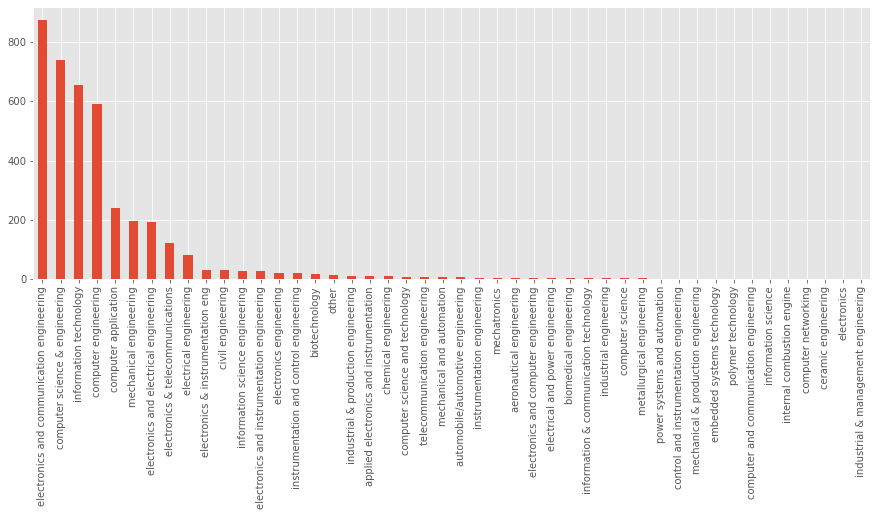

In [50]:
specialization_freq = data['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

In [51]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


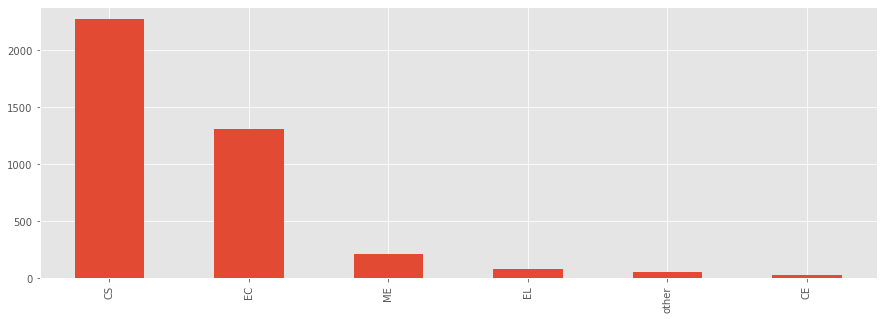

In [52]:
data['Specialization'] = data['Specialization'].map(specialization_map)

data['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(data['Specialization'].unique())

<AxesSubplot:ylabel='Frequency'>

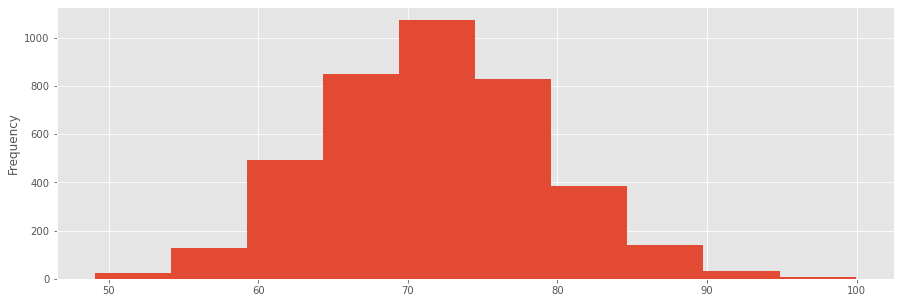

In [53]:
data.loc[data['collegeGPA'] <= 10, 'collegeGPA'] *= 10
data['collegeGPA'].plot(kind='hist', figsize=(15,5))

In [54]:
clean_data=pd.DataFrame()
clean_data=data[data['ComputerScience']>0]

In [55]:
clean_data.shape

(896, 37)

In [56]:
clean_data['Specialization'].unique()

array(['EC', 'CS', 'ME', 'other', 'EL'], dtype=object)

In [57]:
category_list=[ 'Gender', '12board', 'Degree','Specialization'
        ]
numeric_list=[ 'Salary','10percentage', '12percentage', 'collegeGPA',
        'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', '12GradAge',
       'GradAge']

In [58]:
clean_data.drop(columns=['DOJ', 'DOL', 'Designation', 'JobCity','CollegeTier',  
       'CollegeCityTier', '10board','CollegeState','ElectronicsAndSemicon',
        'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

In [59]:
clean_data.columns

Index(['Unnamed: 0', 'Salary', 'Gender', '10percentage', '12percentage',
       '12board', 'Degree', 'Specialization', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'AverageScore', 'Acadperf', '12GradAge',
       'GradAge'],
      dtype='object')

In [60]:
clean_data.to_csv('partial_clean_data.csv', index=False)

In [61]:
for feature in category_list:
    clean_data = pd.get_dummies(clean_data, prefix=feature, columns=[feature])

In [62]:
from sklearn import preprocessing

#z=pd.DataFrame(X_train_scaled)
#y=pd.DataFrame(Y_train_scaled)
 
 
#set up bins
bin = [0,.25,.5,.75,1]

#use pd.cut function can attribute the values into its specific bins
category = pd.qcut(clean_data['Salary'],bin)
category = category.to_frame()
category.columns = ['Sal']

#concatenate age and its bin
y_cat = pd.concat([clean_data['Salary'],category],axis = 1)

#labelencode
le = preprocessing.LabelEncoder()
le.fit(y_cat['Sal'])
le.classes_
Y_train_cat=le.transform(y_cat['Sal']) 

In [63]:
Y_train_cat

array([2, 2, 2, 2, 3, 3, 1, 3, 0, 1, 0, 3, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 2, 2, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1,
       1, 3, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 2,
       2, 3, 1, 2, 2, 2, 3, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 3, 0, 0, 1,
       3, 1, 2, 3, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2,
       0, 1, 0, 0, 2, 1, 1, 3, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 3,
       3, 3, 3, 2, 2, 3, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 3, 0, 0, 0, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 0, 1, 1, 3, 0, 1, 2, 1, 2, 3, 2,
       3, 0, 2, 3, 1, 2, 1, 0, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 3, 0, 1, 2, 3, 2, 0, 3, 1, 2, 0, 3, 3, 3, 3, 3, 2, 3, 0, 2, 0,
       2, 0, 2, 1, 3, 2, 3, 3, 3, 3, 0, 2, 0, 1, 0, 3, 3, 2, 3, 0, 0, 0,
       2, 3, 3, 0, 0, 1, 0, 2, 3, 0, 3, 1, 2, 0, 2, 0, 0, 0, 0, 3, 2, 0,
       3, 1, 1, 2, 0, 3, 1, 0, 2, 3, 2, 0, 0, 0, 1, 3, 2, 0, 3, 0, 1, 3,
       3, 3, 3, 0, 0, 1, 3, 1, 0, 3, 1, 0, 2, 3, 2,

In [64]:
X_train=pd.DataFrame(clean_data.drop(columns=['Salary'],axis=1))
Y_train=pd.DataFrame(clean_data['Salary'])
Y_train_cat=pd.DataFrame(Y_train_cat)
print(X_train.shape,Y_train.shape,Y_train_cat.shape)

(896, 34) (896, 1) (896, 1)


In [65]:
X_train.to_csv('X_train.csv', index=False)
Y_train.to_csv('Y_train.csv',header=True, index=False, index_label='Salary')
Y_train_cat.to_csv('Y_train_cat.csv',header=True, index=False, index_label='Salary')
clean_data.to_csv('clean_data.csv', index=False)

In [66]:
data=pd.read_csv('partial_clean_data.csv')

In [67]:
data.describe(include='object').T

,count,unique,top,freq
Unnamed: 0,896,1,train,896
Gender,896,2,m,677
12board,889,3,state,499
Degree,896,4,B.Tech/B.E.,818
Specialization,896,5,CS,791


In [68]:
data.duplicated().sum()

0

In [69]:
def miss_val(data):
    misval = data.isnull().sum()
    miss_per = 100 * misval/len(data)
    df1 = pd.concat([misval,miss_per],axis=1)
    renamed = df1.rename(columns={0:'missing_val',1:'missing %'})
    new = renamed[renamed.iloc[:,1] !=0].sort_values('missing_val',ascending=False)
    return new

In [70]:
miss_val(data)

,missing_val,missing %
12board,7,0.78125


In [71]:
import missingno as ms

<AxesSubplot:>

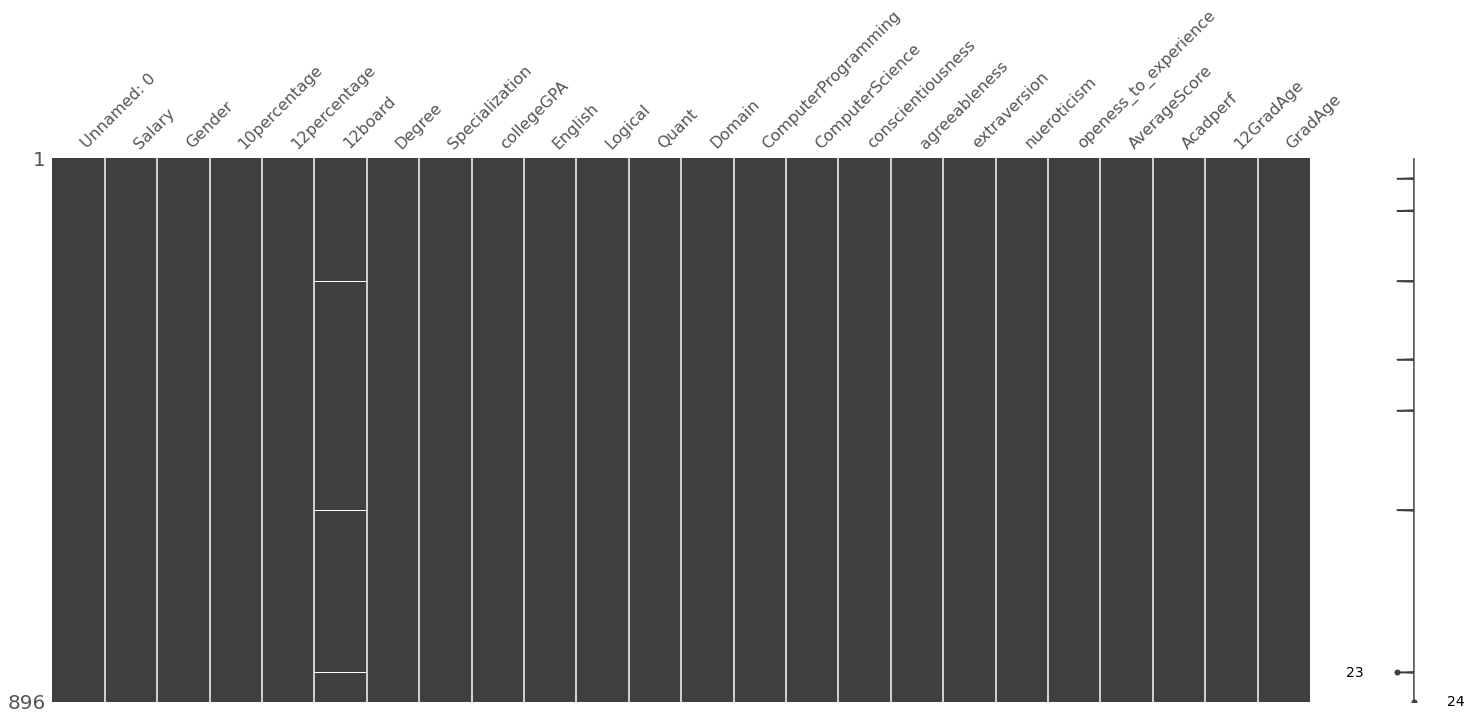

In [72]:
ms.matrix(data)

In [73]:
# Checking categorical variables.
k,v=[],[]
for i in data.select_dtypes('object').columns:
    k.append(i)
    v.append(list(data[i].unique()))
categorydf=pd.DataFrame({'Category':k,'Sub-categoty':v})
print(categorydf)

         Category                                     Sub-categoty
0      Unnamed: 0                                          [train]
1          Gender                                           [m, f]
2         12board                         [state, cbse, icse, nan]
3          Degree  [B.Tech/B.E., MCA, M.Tech./M.E., M.Sc. (Tech.)]
4  Specialization                          [EC, CS, ME, other, EL]


In [74]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))

Number of male candidates : 677
Number of female candidates : 219
Male to Female ratio: 3.09


<AxesSubplot:>

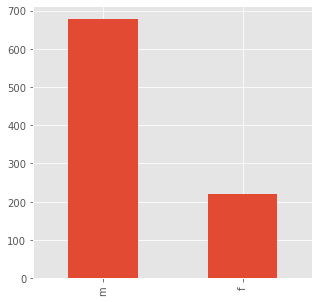

In [75]:
data['Gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

Text(0.5, 0.98, 'Salary levels by gender')

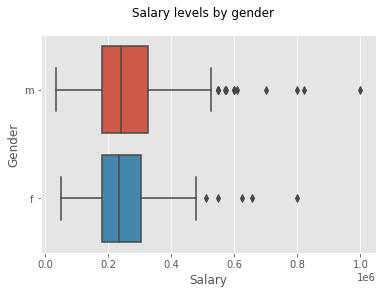

In [76]:
#boxplot visualization of salary levels by gender
#median salary of males is slightly greater than that of females.
#higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')

(array([148., 263., 247., 192.,  28.,  11.,   3.,   2.,   1.,   1.]),
 array([  35000.,  131500.,  228000.,  324500.,  421000.,  517500.,
         614000.,  710500.,  807000.,  903500., 1000000.]),
 <BarContainer object of 10 artists>)

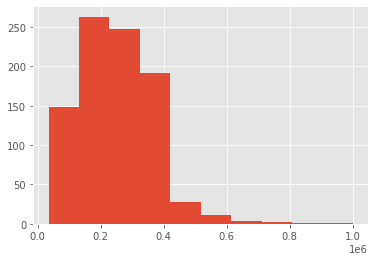

In [77]:
#histogram of salary data
plt.hist(data['Salary'],bins=10)

Text(0.5, 0.98, 'Salary vs 12Board')

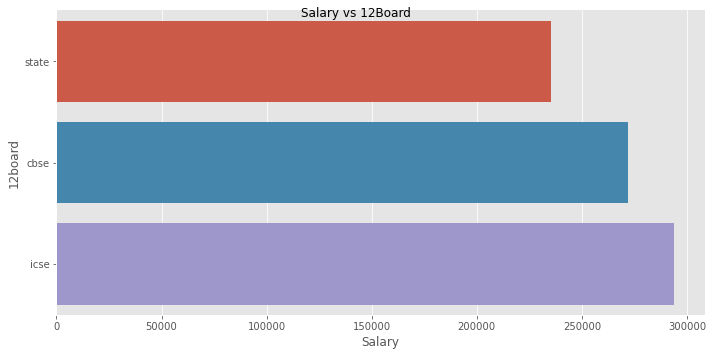

In [78]:
#bar graph of salary levels categorized based on 12th board. and ci=None suppresses error bars
#Students of icse board tend to earn higher salaries than the other two.
sns.factorplot(x='Salary', y='12board', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

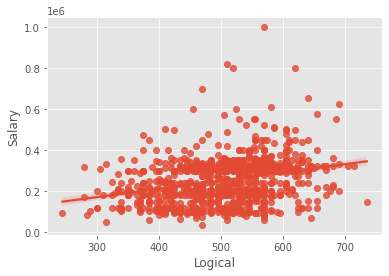

In [79]:
sns.regplot(x='Logical', y='Salary', data=data)

In [80]:
#creating new columns 
data['AverageScore']=(data['Logical']+data['Quant']+data['English'])/3
data['Acadperf']=data['10percentage']+data['12percentage']+data['collegeGPA']/3

<AxesSubplot:xlabel='AverageScore', ylabel='Salary'>

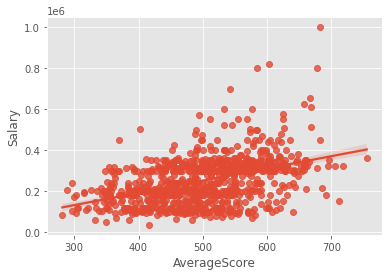

In [81]:
#lpositive correlation between salary and average(logical+quant+english) score is indicated
sns.regplot(x='AverageScore', y='Salary', data=data)

<AxesSubplot:>

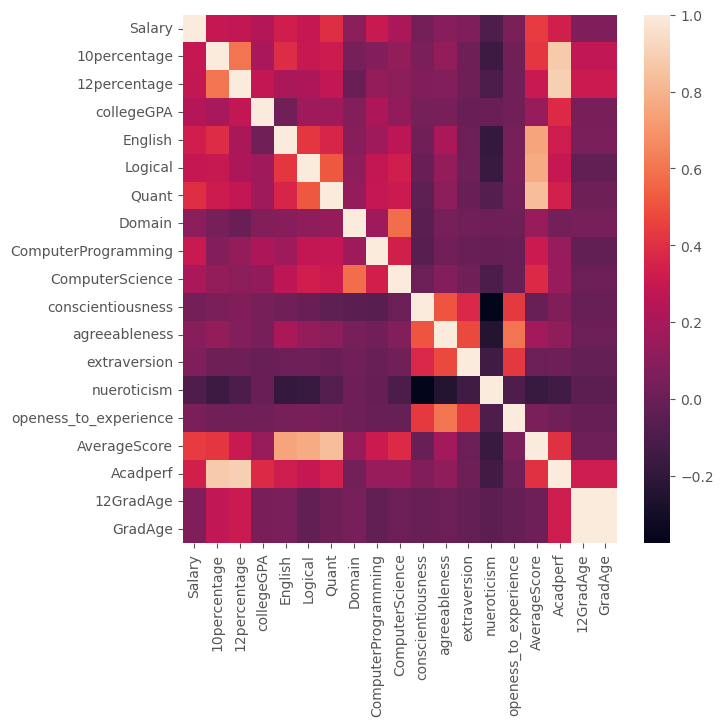

In [82]:
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(data.corr()) # plotting the correlation matrix of the dataset

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

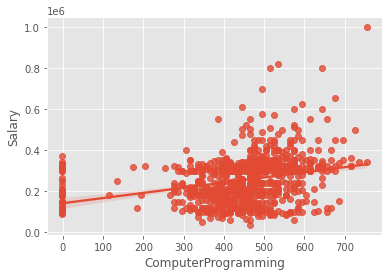

In [83]:
#positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=data)

Text(0.5, 0.98, 'Salary levels by specialization')

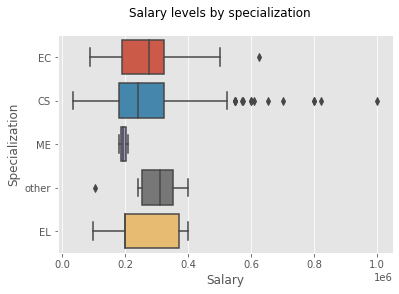

In [84]:
#boxplot visualization of salary and specialization
#it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
#the median salary of EC dept is higher than others.
sns.boxplot(x='Salary', y = 'Specialization', data=data)
plt.suptitle('Salary levels by specialization')